In [16]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii 
import pandas as pd

In [17]:
tab = pd.read_csv("PS_2023.01.18_12.12.33.csv", header=100)

In [18]:
# Data on the planets of our Solar System
# Masses are in kilograms, times 10 to the 24th power
# Radii (equitorial) are in kilometers
# Orbital periods are in years
# Distance from the Sun (semimajor axis) is in AU (astronomical units)
# Average temperatures are in Kelvin

planet_data = {
    "Mercury": {"mass":0.33011,"radius":2439.7,"orbital period":0.241,"semimajor axis":0.387,"average temperature":440.15},
    "Venus": {"mass":4.8675,"radius":6051.8,"orbital period":0.615,"semimajor axis":0.723,"average temperature":737.15},
    "Earth": {"mass":5.9724,"radius":6378.137,"orbital period":1,"semimajor axis":1,"average temperature":288.15},
    "Mars": {"mass":0.64171,"radius":3396.2,"orbital period":1.881,"semimajor axis":1.524,"average temperature":208.15},
    "Jupiter": {"mass":1898.19,"radius":71492,"orbital period":11.862,"semimajor axis":5.204,"average temperature":163.15},
    "Saturn": {"mass":568.34,"radius":60268,"orbital period":29.457,"semimajor axis":9.583,"average temperature":133.15},
    "Uranus": {"mass":86.813,"radius":25559,"orbital period":84.011,"semimajor axis":19.201,"average temperature":78.15},
    "Neptune": {"mass":102.413,"radius":24764,"orbital period":164.79,"semimajor axis":30.048,"average temperature":73.15},}

## Direct Imaging
Direct imaging depends on the fraction of starlight reflected by the planet, which defines the contrast between planet and star.  Planets must be very bright in order to be seen.  One equation for this fraction is dependent on temperature of the star:
$$
f = \Bigl({{R_{p}}\over{R_{*}}}\Bigl)^2\Biggl({{e^{T_{*}{{h\nu}\over{k_{B}}}}-1}\over{e^{T_{p}{{h\nu}\over{k_{B}}}}-1}}\Biggl)
$$
And another equation depends on the brightness of the planet, or its albedo:
$$
f = {{\pi R_{p}^{2}}\over{4 \pi a^{2}}}A
$$
The albedo of many exoplanets is unknown, or at least not recorded within our database.  However, looking at [our own solar system](https://astronomy.swin.edu.au/cosmos/a/Albedo) as a guide, we can see an interesting fact, which is that the bond albedos of Earth, Jupiter, Neptune, Saturn, and Uranus are all right in the range of 0.29 to 0.34.  Mercury and Mars are considerably lower, but these planets do not represent the sizes of objects discovered in exoplanet surveys.  Venus is considerably higher, but Venus is just plain weird.  Most of the planets we discover are in the mass range of Earth to Jupiter (and beyond), so we can reasonably assume that a bond albedo of 0.32 is a fairly typical measurement across the Galaxy.  Therefore:
$$
f = 0.32{{\pi R_{p}^{2}}\over{4 \pi a^{2}}}
$$
so we can define $R_{p}$ and $a$ as follows:
$$
a = \sqrt{{{0.32 \pi R_{p}^{2}}\over{4 \pi f}}}
$$
$$
R_{p} = \sqrt{{{4 \pi a^{2} f}\over{0.32 \pi}}}
$$
According to [Soulain 2022](https://ui.adsabs.harvard.edu/abs/2020SPIE11446E..11S/abstract), the James Webb Space Telescope (JWST) is theoretically capable of detecting a planet to star contrast of f=$10^{-4}$.  So by replacing $f$ in the above equations with this value, we arrive at the state of the art sensitivity level for direct imaging.

In [23]:
from math import sqrt

def direct_radius(a):
    Radius = sqrt((4*a**2*10**-4)/(0.32))
    
    return Radius

In [24]:
def direct_semiamp(r):
    amp = sqrt((0.32*r**2)/(4*10**-4))
    
    return amp

NameError: name 'transit_axis' is not defined

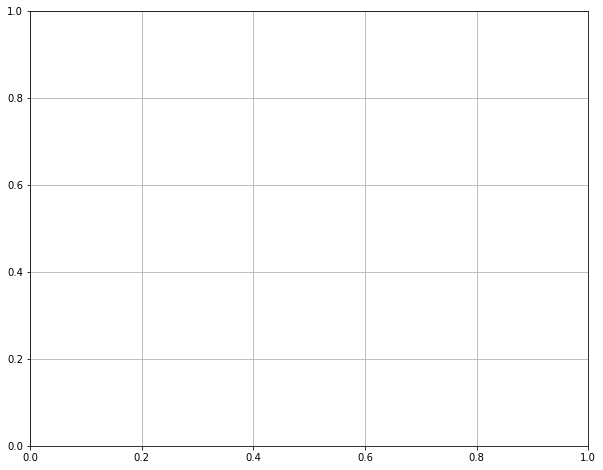

In [25]:
fig, ax = plt.subplots(figsize=(10,8))
# Plotting both data sets with labels and markers
plt.grid()
plt.scatter(transit_axis, transit_radius, label="Transit",s=40,facecolors='none', edgecolors='b')
plt.scatter(rv_axis, rv_radius, label="Radial Velocity",s=40,facecolors='none', edgecolors='r',marker='s')
plt.scatter(image_axis, image_radius, label="Imaging",s=40,facecolors='none', edgecolors='c',marker='d')
plt.scatter(micro_axis, micro_radius, label="Microlensing",s=40,facecolors='none', edgecolors='gray',marker='^')
plt.scatter(astro_axis, astro_radius, label="Astrometry",s=40,facecolors='none', edgecolors='m',marker='X')
plt.scatter(all_distances, all_radius, label="Solar System Data",facecolors='hotpink')
plt.annotate("Mer", (all_distances[0], all_radius[0]))
plt.annotate("V", (all_distances[1], all_radius[1]))
plt.annotate("E", (all_distances[2], all_radius[2]))
plt.annotate("Mars", ( all_distances[3], all_radius[3]))
plt.annotate("J", (all_distances[4], all_radius[4]))
plt.annotate("S", (all_distances[5], all_radius[5]))
plt.annotate("U", (all_distances[6], all_radius[6]))
plt.annotate("N", (all_distances[7], all_radius[7]))
# Setting plot limits
plt.xscale("log")
plt.yscale("log")
#ax.set_xlim(0.1, 100)
#ax.set_ylim(0.2, 50)

#detection limit
plt.plot(10.0**(np.arange(-2, 4)), direct_radius(10.0**(np.arange(-1, 2))), color="red", label="Direct Imaging Detection Limit")

#Setting labels
ax.set_xlabel("Semimajor Axis (AU)", fontsize=16)
ax.set_ylabel("Radius (Earth Radii)", fontsize=16)
ax.set_title("Radius vs Semimajor Axis", fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.legend()
plt.show()
#fig.savefig('RadiusOrb.png', bbox_inches='tight')

## References
Vanderburg et al. 2017, "Planetary Candidates from the First Year of the K2 Mission," The Astrophysical Journal Supplement Series, Volume 222, Issue 1, article id. 14, 15 pp. (2016).
    
Soulain et al. 2022, "The James Webb Space Telescope aperture masking interferometer," Proceedings of the SPIE, Volume 11446, id. 1144611 18 pp. (2020).